 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 8. Auto Encoder**
# Section 5. Stacked Auto Encoder

### _Objective_
1. Deep Neural Network와 같이, 오토 인코더도 깊게 쌓을 수 있습니다. <br>
2. 비선형성 덕분에, PCA보다 훨씬 더 적은 차원의 Manifold로 사상시킬 수 있습니다.
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

### MNIST 가져오기

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")

train_images = mnist.train.images
valid_images = mnist.validation.images
test_images = mnist.test.images

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._<br>

In [0]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))

    display(HTML(iframe))

<br><br>

# \[ 1. Stacked Auto Encoder 구성하기 \]

----

----

> *PCA와 달리, Auto Encoder는 층을 쌓아, 특징들간 비선형 관계를 표현할 수 있습니다.*<br>
> *Stacked Auto Encoder는 보다 Feature 간 관계를 유연하게 표현할 수 있기 때문에,
원하는 수준의 저차원 Manifold로 사상시키더라도, 정보의 손실이 적습니다.
<br>

### (1) 인코더 구성하기

In [0]:
graph = tf.Graph()

num_input = 784
num_hidden1 = 300
num_hidden2 = 100
num_hidden3 = 2

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None,num_input), name='x')
    lr = tf.placeholder_with_default(0.01, None, name='learning_rate')
    
    # encoded_1,2 의 activation function 은 relu로 합니다.    
    encoded_1 = #fix me#
    encoded_2 = #fix me#
    # encoded_3 의 activation function 은 tanh로 합니다.
    encoded_3 = #fix me#
    hidden = tf.identity(encoded_3, 'hidden')

In [0]:
show_graph(graph)

### (2) 디코더 구성하기

In [0]:
with graph.as_default():    
    decoded_2 = #fix me#
    decoded_1 = #fix me#
    outputs = #fix me#
    outputs = tf.identity(outputs, 'reconstruction')

In [0]:
show_graph(graph)

### (3) 학습을 위한 operation 구성하기

In [0]:
with graph.as_default():
    # Mean square error 
    loss = #fix me#

    with tf.variable_scope('metric'):
        # Metric 
        rmse = #fix me#
        
    with tf.variable_scope('train'):
        # adam optimizer 
        train_op = #fix me#

In [0]:
show_graph(graph)

### (4) 학습시키기

In [0]:
num_epoch = 20 # epoch 횟수
num_batch = 128 # 배치 크기
num_data = mnist.train.num_examples # data의 수
num_step = num_data // num_batch # 1 epoch 별 학습 횟수

with graph.as_default():
    # Session 을 생성합니다. 
    sess = # fix me # 
    # 변수들을 초기화 합니다. 
    sess.run(tf.global_variables_initializer())

    for i in range(num_epoch):        
        for _ in range(num_step):
            images, _ = #fix me# 
            # learning rate 은 0.0005 로 고정합니다.
            # Training 을 합니다.
            sess.run(#fix me#)
        # 평가지표(metric)인 rmse 을 출력합니다.
        rmse_value = sess.run(rmse, feed_dict={x:valid_images})
        print("{:2d}th epoch test RMSE : {:.5f}".format(i,rmse_value))

 0th epoch test RMSE : 0.23014
 1th epoch test RMSE : 0.22019
 2th epoch test RMSE : 0.21406
 3th epoch test RMSE : 0.21104
 4th epoch test RMSE : 0.20839
 5th epoch test RMSE : 0.20668
 6th epoch test RMSE : 0.20484
 7th epoch test RMSE : 0.20374
 8th epoch test RMSE : 0.20228
 9th epoch test RMSE : 0.20161
10th epoch test RMSE : 0.20064
11th epoch test RMSE : 0.19960
12th epoch test RMSE : 0.19907
13th epoch test RMSE : 0.19865
14th epoch test RMSE : 0.19831
15th epoch test RMSE : 0.19760
16th epoch test RMSE : 0.19690
17th epoch test RMSE : 0.19647
18th epoch test RMSE : 0.19584
19th epoch test RMSE : 0.19568


### (5) 평가하기

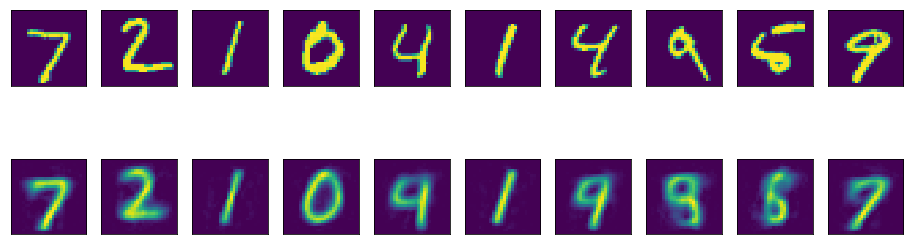

In [0]:
# outputs tensor 을 출력합니다.
reconstruction = sess.run(#fix me#)
# 0,1로 clipping 합니다.
reconstruction = np.clip(#fix me #)
# 이미지로 시각화 하기 위해 reshape 합니다. (n_sample, 28, 28)
reconstruction = reconstruction.reshape(-1,28,28)

fig, (ax1, ax2) = plt.subplots(2,10, figsize=(16,5))

for i in range(10):
    ax = ax1[i]
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(test_images[i].reshape(28,28))
    
for i in range(10):
    ax = ax2[i]
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(reconstruction[i])

plt.show()

<br><br>

# \[ 2. 잠재공간(latent space) 시각화하기 \]

----

----

> *잠재 공간 위에서 데이터는 유사한 데이터끼리 군집화가 되어 있고, 부드럽게 이어져 있습니다.*<br>
> *우리가 만든 잠재 공간 위에서 임의의 데이터를 넣으면, 실제 데이터 상에선 존재하지 않았던 새로운 데이터를 만들 수 있습니다.*<br>

## 1.  잠재 공간 분포 시각화
----

* 잠재공간 아래에 데이터가 어떤 식으로 군집화되어 있는지 시각화해보도록 하겠습니다.

In [0]:
valid_labels = mnist.validation.labels

plt.figure(figsize=(10,10))
for label in range(10):
    idx = np.where(valid_labels==label)[0]
    color_name = 'C{}'.format(label)
    
    plt.scatter(result[idx,0],
                result[idx,1],
                c=color_name,
                label=str(label))
plt.legend()
plt.show()

## 2.  잠재 공간 내 이미지 시각화
----

* 잠재공간 내 grid를 만들어, 하나씩 데이터를 시각화해보도록 하겠습니다.

In [0]:
# x 축 , y축 각가 -1~1까지 0.05 단위로 grid을 생성합니다. 
ys,xs = # fix me #

# xs, ys 을 flatten 한 후 axis=1축으로 stack 합니다.  
points = # fix me # 

# 최종 semantic vector에 위 좌표에 생성된 값을 넣고 결과물을 출력합니다.
grid_images = sess.run(#feed_dict#)

plt.figure(figsize=(10,10))
#40,40 이미지를 1120,1120 이미지로 변환합니다. 
res_images = #fix me# 
plt.imshow(res_images)
plt.show()

올바르게 학습된 매니폴드 공간은 매니폴드 좌표들이 조금씩 변할 때 원 데이터도 유의미하게 조금씩 변함을 보여야 합니다.<br>
위에서는 조금씩 변하기는 하지만, 경계선에 있는 이미지들은 흐릿하게 변하는 것을 보아 학습의 여지가 아직 많습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/14

---